#### Answring some questions about data mining subject

##### 1- What is another preferred name of data mining?
- Another preferred name is Knowledge discovery from databases (KDD).
 
                                                    -----------------------------


##### 2- Why Data Mining is a misnomer? 
- It's considered minsomer because we are not search for data itself because we already have it but it's dedicated to extract a knowldege and patterens from a huge amount of data.
 
                                                    -----------------------------
                                                    
##### 3- What is the general knowledge discovery process?
- it's the process that if we follow its steps we will discover meaningful knowledge and patterns from huge data, and emphasizes the "high-level" application of particular data mining methods.

And its steps are:
1. Determine the domain.
2. Understanding the problem.
3. Get the task-relevant data from the data warehouse or databases.
4. Understanding the data.
5. Cleaning the data (remove noise, null values, duplicates, convert their features to the proper data type).
6. Choosing the data mining goal (classification, regression, clustring) and select the best model to reach this goal. (choose best hyperparameters, etc...)
7. Data mining
8. Pattern evaluation

                                                    -----------------------------

##### 4- What is the difference between a data engineer and data scientist/AI engineer?
- They have common things when it comes to skills and mindset but the main difference between data engineer and data scientist is that the data engineer is someone who is responsible for handling and storing data into databases and large-scale processing systems also develops, constructs, tests and maintains architectures and delivering task-relevant data from source to its required destination, on the other hand, the data scientist is responsible for clean and organize and interpret the non-meaningful data using some mathematical and statistical methods also extract knowledge and gain insights from it using some business solutions models. wherease AI engineers perform include designing neural networks, performing computational analysis, creating mathematical models and implementing algorithms that help machines learn how to do specific tasks and also depoly the final model into real bussiness application or API.

                                                    -----------------------------

##### 5- In data mining, what is the difference between prediction and categorization?
- the main difference between prediction and categorization is that categorization (classification) is to determine the (categorical) labels (discrete value) of objects whose class label is unknown or classify these observations into their right categories like the type of fruit, on the other hand, prediction (regression) about predicts the unknown numerical value (continuous value) like predicting the price of a new house and it's mostly used to predict the value of something in the future.

                                                    -----------------------------


##### 6- What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
- The CIA triad is a concept for guiding information security policy within an organization and it named like that because it consists of three important key terms confidentiality (is a set of rules that restricts information access), integrity (make sure that the information in the organization is accurate and reliable), availability(is a guarantee that only authorized people will have dependable access to information). and we can use it in our AI pipelines to ensure that AI pipeline follow CIA guidlines or to check what is the type of attaks that we are under and fix the situation quickly.

types of attacks:

- Adversarial (front-end) - Confidentiality
- Backdoor/data poisoning (data source) – Integrity
- Training data reconstruction – Confidentiality (privacy)
- Steeling the model - Confidentiality
- Membership inference - Confidentiality (privacy)

                                                    -----------------------------

##### 7- Why data science/machine learning is a bad idea in the context of information security?

because data science is a data-driven approach so it depends on the data to work and that may be increased risk of data breach and fine and by that you may build a bad model, or may be fed a wrong informaiton to your model, also you have to make sure that you're folllow data privacy guidlines.


## Problem formulation:

here we have a dataset from Kaggle which was originally scraped from Wish E-Commerce Platform. It contains some input features like (price, retail_price, product_size, product_colour) and the output here is rating. so our job here to build the model to make us able to answering some quesitons like.

- What are the top selling products?
- Which are the most important features that help us predicting whether the product will succuess or nor?sold?
- what's the expected rating of product before listing it out into the site?

The first challenge here is that the data is not clean and we need a lot of preprocessing on it.

The second challenge here is that the data is imblanced data set (we have a lot 4 rating and only 11 rating of 2).

The impact of solving this problem that is you can make an educated guess about how likely people are to like your product without actually putting it on the market. In addition, by doing so, we may better determine under what circumstances a product will be highly rated, as well as the wish.com consumer base.


</br>


### Data mining function

- **classification & prediction**

</br>


## Experimental protocol:

first: Data Processing:

It’s a key step in Machine Learning project to ensure that data is transformed ,clean, and easy to use for analytical purpose.
Below are some important/key steps:
1. Drop irrelevant and unnecessary features.
2. Check if there is any null values and replace them.
3. Create new features from existing features if needed
4. Clean categorical variables.

second: convert categorical and string columns to numerical columns.

third: start buliding your models and choose the best one.


### First: let's import all required packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to match some patternes 
import re
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

np.printoptions()

### Second: read wish dataset

- step 1: read train dataset
- step 2: read test dataset
- step 3: drop row with rating value 6 because the rating range from 1 to 5
- step 4: merge both datasets because there's values in test set not in train set in vice versa so when you'll some columns to one hot encoding the number features in both datasets when you spilt them again should be equal to each others.

- step 5: have a look at your data.

#### Note: you'll find the data set in https://www.kaggle.com/competitions/cisc-873-dm-f22-a1

In [35]:
df1 = pd.read_csv('train_new.csv')#
df2= pd.read_csv('test_new.csv')#

df1 = df1[df1['rating'] != 6]
df1 = df1.reset_index(drop=True)


#

frames = [df1, df2]
df = pd.concat(frames,ignore_index=True)
df = df.drop(['theme','id','urgency_text','merchant_title','merchant_info_subtitle','currency_buyer','merchant_name','merchant_id','merchant_profile_picture','crawl_month'],axis=1)


#this columns we'll change their types to categorical datatype after cleaning them.
columns = ['merchant_has_profile_picture','has_urgency_banner','badge_local_product','badge_product_quality','badge_fast_shipping','shipping_is_express','product_variation_size_id','product_color']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1572 non-null   float64
 1   retail_price                  1572 non-null   int64  
 2   units_sold                    1572 non-null   int64  
 3   uses_ad_boosts                1572 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1572 non-null   int64  
 6   badges_count                  1572 non-null   int64  
 7   badge_local_product           1572 non-null   int64  
 8   badge_product_quality         1572 non-null   int64  
 9   badge_fast_shipping           1572 non-null   int64  
 10  tags                          1572 non-null   object 
 11  product_color                 1531 non-null   object 
 12  product_variation_size_id     1558 non-null   object 
 13  pro

### third: clean "has_urgency_banner column".

we will replace null values in this column with 0, since it has only 1 and null values.

In [36]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

### fourth: Normalize numeric columns values between 0 and 1 to handel outliers.

In [37]:
#min_max_scaler constructor
min_max_scaler = MinMaxScaler()
#extract integer columns
myCols = df.select_dtypes(include='int64').columns
#normlize integer columns
df[myCols] = min_max_scaler.fit_transform(df[myCols])
#normalize float columns
df[['price','merchant_rating']] = min_max_scaler.fit_transform(df[['price','merchant_rating']])

### fifth: polt each value count in each column

In [38]:
def histograms_and_countplots(column, data):
        if data[column].dtype not in ['int64', 'float64']:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data = data)
            plt.xticks(rotation=90)
            plt.suptitle(column,fontsize=20)
            plt.show()
        else:
            g = sns.FacetGrid(data, margin_titles=True, aspect=4, height=3)
            g.map(plt.hist,column,bins=100)
            plt.show()
        plt.show()

### sixth: create submission file.

note: the file that you'll pass it to that function should contain columns names (id, rating) and id values

In [39]:
def create_sample_file(file_path,predicted_values):
    df = pd.read_csv(file_path) #empty file with column names
    df['rating'] = predicted_values #prediction values
    df.to_csv(file_path, index=False) #write changes


### seventh: replace low-frequancy values with value of my choice

As one can see, there is a lot of distinct values in some column . Most of these values are either redundant or irrelevant due to low frequency count.



In [40]:
def replace_less_values(col,value_to_be_replaced):
    #extract values with count 2 or less than 2
    bool_lst = [df[col].value_counts() <= 2]
    lst = list(df[col].value_counts().index[tuple(bool_lst)])
    #replace them with value of my choice
    df[col].replace(dict.fromkeys(lst, value_to_be_replaced),inplace=True)

### Eighth: clean size column.

 - step 1: replace null values with 'ANOTHER_SIZE' value.
 - step 2: replace some redundant values with true values based on regular expression pattern ex ('SIZEL' will be 'L', SIZE\S will 'S').
 - step 3: replace some values like XXXXS will be 4XS. 

In [41]:
def clean_product_size(cell):
    
    #replace null values with "ANOTHER_SIZE"
    if not isinstance(cell,str) and math.isnan(cell):
        return "ANOTHER_SIZE"

    #set some regex patterns    
    pattern = re.compile(r'(\bL\b|(?<=[^MF])L|\bX+S|S\b|\bS\b|\dXS|\bM\b|\d?X+L)')
    match = re.search(pattern,cell)
    #if value doesn't match the pattern don't do anything.
    if match is not None:
        cell = match[0]

    #if value has more than X replace the value the number of X's       
    if cell.count('X') > 1 and (cell.endswith('XS') or cell.endswith('XL')):
        cell = f"{cell.count('X')}X{cell[-1]}"
        
    return cell    

In [42]:
#Count of product_variation_size_id before the cleaning.
print(df['product_variation_size_id'].value_counts())
df['product_variation_size_id'] = df['product_variation_size_id'].str.upper()
df.product_variation_size_id = df.product_variation_size_id.apply(clean_product_size)
replace_less_values('product_variation_size_id','ANOTHER_SIZE')
#Count of product_variation_size_id after the cleaning.
df.product_variation_size_id.value_counts()

S                641
XS               356
M                200
XXS              100
L                 49
                ... 
XXXXXL             1
20PCS-10PAIRS      1
Size-5XL           1
Size/S             1
36                 1
Name: product_variation_size_id, Length: 106, dtype: int64


S               703
XS              369
M               206
2XS             107
ANOTHER_SIZE     59
L                58
2XL              19
XL               18
4XL              10
3XS               6
3XL               4
5XL               4
10 ML             3
34                3
33                3
Name: product_variation_size_id, dtype: int64

### nineth: clean product color column

- step 1: convert all values to upper case.
- step 2: replace all null values to "ANOHTER COLOR"
- step 3: replace some low-frequancy values to thier true value manually EX (GRAY (low-frequany count) will be GREY (high-frequancy count), ROSE RED will be RED).
- step 4: replace low-frequancy values with "ANOTHER_COLOR"

In [43]:
df['product_color'] = df['product_color'].str.upper()
df['product_color'] = df['product_color'].fillna('ANOTHER_COLOR')
df["product_color"] = df["product_color"].replace({
    "GRAY": "GREY",
    'ARMYGREEN': 'ARMY GREEN',
    'LIGHTGRAY': 'LIGHTGREY', 
    'MULTICOLOR':'ANOTHER_COLOR',
    'CLARET':'RED',
    'ROSEGOLD':'PINK',
    'VIOLET':'PURPLE',
    'IVORY':'WHITE',
    'COFFEE':'BROWN',
    'KHAKI': 'BROWN',
    'NAVY':'BLUE',
    'LIGHTKHAKI':'YELLOW',
    'ROSE':'RED',
    'ROSE RED':'RED'
})

replace_less_values('product_color','ANOTHER_COLOR')

df['product_color'].value_counts()

BLACK               305
WHITE               258
ANOTHER_COLOR       137
YELLOW              106
BLUE                104
PINK                102
RED                 100
GREEN                90
GREY                 82
PURPLE               54
ARMY GREEN           34
NAVYBLUE             28
WINERED              28
ORANGE               27
BROWN                26
BEIGE                14
LIGHTBLUE            12
WHITE & GREEN        10
SKYBLUE               8
ROSERED               8
DARKBLUE              6
FLORAL                5
LIGHTPINK             4
BLACK & GREEN         4
FLUORESCENTGREEN      4
LEOPARD               4
CAMOUFLAGE            3
BLACK & WHITE         3
LIGHTGREEN            3
ORANGE-RED            3
Name: product_color, dtype: int64

### tenth: clean origin_country column

- step 1: replace 'null' values with 'OTHER'
- step 2: replace low-frequancy count values with 'OTHER'

In [44]:
df['origin_country'] = df['origin_country'].fillna('OTHER')
replace_less_values('origin_country','OTHER')
df.origin_country.value_counts()

CN       1515
US         31
OTHER      21
VE          5
Name: origin_country, dtype: int64

Does the products with ad boosts features has high rates?

<AxesSubplot:xlabel='uses_ad_boosts', ylabel='count'>

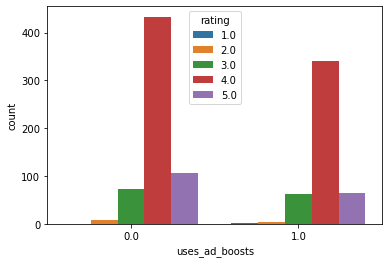

In [45]:
sns.countplot(data=df, x='uses_ad_boosts', hue='rating')

from the plot it's obvious that the most products that has ad boosts features has high rate.

In [46]:
df[columns] = df[columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   price                         1572 non-null   float64 
 1   retail_price                  1572 non-null   float64 
 2   units_sold                    1572 non-null   float64 
 3   uses_ad_boosts                1572 non-null   float64 
 4   rating                        1093 non-null   float64 
 5   rating_count                  1572 non-null   float64 
 6   badges_count                  1572 non-null   float64 
 7   badge_local_product           1572 non-null   category
 8   badge_product_quality         1572 non-null   category
 9   badge_fast_shipping           1572 non-null   category
 10  tags                          1572 non-null   object  
 11  product_color                 1572 non-null   category
 12  product_variation_size_id     1572 non-null   ca

After all of that now our data is clean, now let's convert categorical columns and string columns to numeric columns to make the models able to learn from them.

#### First: tags columns

tags column is an string column and has a lot of unique values so it is not a good idea to convert it to numerical column using one hot encoding method, instead we will use CountVectorizer method.

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [47]:

#build object
vect = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

#define the column
text = df['tags']

#extract words
vect.fit(text)

#Transform tags to vectors
train = vect.fit_transform(text)

train.toarray()

#convert train array to dataframe
data = pd.DataFrame(train.toarray(), columns=vect.get_feature_names())
data.shape

(1572, 2067)

In [48]:
#merge new columns to the dataframe and drop tags column

df = pd.concat([df.drop(['tags'],axis=1),data], axis=1, join='inner')

#### Second: convert categorical columns to numerical columns using one hot encoding method.

In [49]:
#categorical columns
features = ["product_variation_size_id","shipping_option_name",'product_color','origin_country']

df = pd.get_dummies(df, columns = features)


Let's split train set and test set

In [50]:
#split X_test
X_test = df.iloc[df1.shape[0]:,:]
#X_train split

X_train = df.iloc[:df1.shape[0],:]
#drop rating column from X_test (anyway all values in X_test rating is null because orginal test set doesn't have rating column)
X_test = X_test.drop(['rating'],axis=1)

#drop any duplicated values from X_train
X_train = X_train.drop_duplicates()
#extract labels
y_train = X_train['rating']
#drop rating column from X_train.
X_train = X_train.drop(['rating'],axis = 1)

## First model: Decision tree using grid search to tune hyperparameters

In [51]:
DT_param_1 = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split':[2,3,4,5],
    'criterion': ["entropy", "gini"]
}

model_dt_1 = DecisionTreeClassifier()


grid_search = GridSearchCV(estimator=model_dt_1, param_grid= DT_param_1, cv=5, n_jobs=-1, verbose=3)


grid_search.fit(X_train, y_train)

predicted_test_dt = grid_search.predict(X_test)
print(f"best hyperparameters found are {grid_search.best_estimator_}")

predicted_test_dt.astype(float)
print(Counter(predicted_test_dt))
create_sample_file('sample Descision tree with hyperparmeter 1.csv',predicted_test_dt)

check_dt_1 = pd.read_csv('sample SVM with hyperparameter 1.csv')
print(Counter(check_dt_1['rating']))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best hyperparameters found are DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
Counter({4.0: 443, 5.0: 26, 3.0: 10})


## Second model: Decision tree with tuning hyperparameters manually.

In [52]:
#model_dt_2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, criterion = 'gini') first trial: f1-score 76.643, I will decrease the max-depth values and increase the min_samples_leaf by one
#model_dt_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 3, criterion = 'gini') second trial: f1-score 77.643, I will change the criterion from gini to entropy
#model_dt_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 3, criterion = 'entropy') second trial: f1-score 79.03, I will change the min_sample_leaf to 2
model_dt_2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 6, criterion = 'entropy') #best hyper parameters with f1 score 79.991




model_dt_2.fit(X_train, y_train)
predicted_test_dt_2 = grid_search.predict(X_test)

predicted_test_dt_2.astype(float)
print(Counter(predicted_test_dt_2))
create_sample_file('sample Descision tree with hyperparmeter 2.csv',predicted_test_dt_2)

#check_dt_2 = pd.read_csv('sample SVM with hyperparameter 1.csv')
#print(Counter(check_dt_2['rating']))

Counter({4.0: 443, 5.0: 26, 3.0: 10})


## Third model: SVM with using grid search to tune hyperparameters

In [53]:
svm_param_1 = {
    'C': [0.01,0.1,1.0],
    'kernel' : ['linear', 'rbf'],
    'gamma': [0.5,0.1,1]
}

model_svm_1 = SVC(probability=True)


grid_search = GridSearchCV(estimator=model_svm_1, param_grid= svm_param_1, cv=5, n_jobs=-1, verbose=3)



grid_search.fit(X_train, y_train)
predicted_test_svm = grid_search.predict(X_test)
print(f"best hyperparameters found are {grid_search.best_estimator_}")

predicted_test_svm.astype(float)
print(Counter(predicted_test_svm))
create_sample_file('sample SVM with hyperparameter 1.csv',predicted_test_svm)

check_svm_1 = pd.read_csv('sample SVM with hyperparameter 1.csv')
print(Counter(check_svm_1['rating']))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best hyperparameters found are SVC(gamma=0.1, probability=True)
Counter({4.0: 437, 3.0: 26, 5.0: 15, 2.0: 1})
Counter({4.0: 437, 3.0: 26, 5.0: 15, 2.0: 1})


## Fourth model: SVM with tuning hyperparameters manually.

In [54]:
#model_svm_2 = SVC(C= 0.01, kernel = 'linear', gamma= 0.5,probability=True) trial 1: with f1 score= 0.65321 you need to make the model more complex (change the kernel)
#model_svm_2 = SVC(C= 0.1, kernel='poly',degree= 4 , probability=True) trial 2: with f1 score = 0.683213 you need to change the kernel to rbf
#model_svm_2 = SVC(C = 10, kernel ='rbf',probability=True) trial 3: with f1 score 0.653213 change the kernel to poly and make it more simpler.
model_svm_2 = SVC(C = 1, kernel ='poly',degree = 2,probability=True) #best f1 score with 0.77500


model_svm_2.fit(X_train, y_train)
predicted_test_svm_2 = grid_search.predict(X_test)

predicted_test_svm_2.astype(float)
print(Counter(predicted_test_svm_2))
create_sample_file('sample SVM with hyperparameter 2.csv',predicted_test_svm_2)

check_svm_2 = pd.read_csv('sample SVM with hyperparameter 2.csv')
print(Counter(check_svm_2['rating']))

Counter({4.0: 437, 3.0: 26, 5.0: 15, 2.0: 1})
Counter({4.0: 437, 3.0: 26, 5.0: 15, 2.0: 1})


## Fifth model: Multinomial with tuning hyperparameters manually.

In [55]:
#clf = MultinomialNB(alpha=0.01) trial 1: f1-score 60.1231 a lot of missclassified values, maybe it's an overfitting use a highr alpha

#clf = MultinomialNB(alpha= 0.05) trial 2:  f1-score 70.31 you still need to use a higher alpha

#clf = MultinomialNB(alpha = 0.1) trial 3: f1-score 70.31 you still need to use a higher alpha

clf = MultinomialNB(alpha = 0.5) # last trial best f1 score 0.75732

clf.fit(X_train, y_train)
predicted_test_NV = clf.predict(X_test)

print(Counter(predicted_test_NV))


predicted_test_NV.astype(float)

print(predicted_test_NV.dtype)
create_sample_file('Sample NV.csv',predicted_test_NV)
check_NV = pd.read_csv('Sample NV.csv')
print(Counter(check_NV['rating']))

Counter({4.0: 399, 5.0: 49, 3.0: 28, 2.0: 3})
float64
Counter({4.0: 399, 5.0: 49, 3.0: 28, 2.0: 3})


The ideal solution for this problem is to use decision tree classifier